In [1]:
from keras import models
from keras import layers
import numpy as np
import math
import json

Using TensorFlow backend.
D:\MyCode\Anaconda\envs\AiMusic\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\MyCode\Anaconda\envs\AiMusic\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\MyCode\Anaconda\envs\AiMusic\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\MyCode\Anaconda\envs\AiMusic\lib\site-packages\tensorflo

In [2]:
model = models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(800,)))
model.add(layers.Dropout(0.13))
model.add(layers.Dense(64,activation='relu',input_shape=(800,)))
model.add(layers.Dropout(0.13))
model.add(layers.Dense(45,activation='softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [4]:
obj_r=open("./test/json/datasetx_train2.json")
obj_r2 = open("./test/json/datasetx_result2.json")
input_train = json.load(obj_r)
input_train = np.array(input_train)
print(len(input_train))
y = json.load(obj_r2)
y = np.array(y)
y = y*2093.004


756


In [5]:
def fre_to_note_piano(fre):
    index = round(math.log(fre / 27.5,2**(1/12)))
    dict = ["A1 ","#A1 ","B1 ","C2 ","#C2 ","D2 ","#D2 ","E2 ","F2 ","#F2 ","G2 ","#G2 ","A2 ","#A2 ","B2 ","C3 ","#C3 ","D3 ","#D3 ","E3 ","F3 ","#F3 ","G3 ","#G3 ","A3 ","#A3 ","B3 ","C4 ","#C4 ","D4 ","#D4 ","E4 ","F4 ","#F4 ","G4 ","#G4 ","A4 ", "#A4 ", "B4 ", "C5 ", "#C5 ", "D5 ", "#D5 ", "E5 ","F5 ","#F5 ","G5 ","#G5 ","A5 ", "#A5 ", "B5 ", "C6 ", "#C6 ", "D6 ", "#D6 ", "E6 ",
    "F6 ","#F6 ","G6 ","#G6 ","A6 ", "#A6 ", "B6 ", "C7 ", "#C7 ", "D7 ", "#D7 ", "E7 ","F7 ","#F7 ","G7 ","#G7 ","A7 ", "#A7 ", "B7 ", "C8 ","#C8 ","D8 ","#D8 ","E8 ","F8 ","#F8 ","G8 ","#G8 ","A8 ","#A8 ","B8 ","C9 ","#C9 ", "D9 ", "#D9 ", "E9 ","F9 ","#F9 ","G9 ","#G9 ","A9 ", "#A9 ", "B9 ", "C10 "]
    return index+21
y_train = np.zeros((len(y),45))
test_standard = []
for i in range(len(y)):
    index = fre_to_note_piano(y[i])
    y_train[i][index-40] = 1
    100
    
x_val=input_train[0:50]
y_val=y_train[0:50]
input_train=input_train[50:]
y_train=y_train[50:]


In [6]:
history=model.fit(input_train,y_train,batch_size=10,epochs=400,validation_data=(x_val,y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 706 samples, validate on 50 samples
Epoch 1/400
706/706 [==============================] - 0s 545us/step - loss: 3.8002 - acc: 0.0496 - val_loss: 3.7822 - val_acc: 0.1200
Epoch 2/400
706/706 [==============================] - 0s 179us/step - loss: 3.7695 - acc: 0.0935 - val_loss: 3.7442 - val_acc: 0.1600
Epoch 3/400
706/706 [==============================] - 0s 185us/step - loss: 3.7123 - acc: 0.1020 - val_loss: 3.6666 - val_acc: 0.1800
Epoch 4/400
706/706 [==============================] - 0s 171us/step - loss: 3.6273 - acc: 0.1119 - val_loss: 3.5590 - val_acc: 0.2000
Epoch 5/400
706/706 [==============================] - 0s 178us/step - loss: 3.5091 - acc: 0.1388 - val_loss: 3.4022 - val_acc: 0.2200
Epoch 6/400
706/706 [==============================] - 0s 157us/step - loss: 3.3538 - acc: 0.2025 - val_loss: 3.2036 - val_acc: 0.3200
Epoch 7/400
706/706 [==============================

706/706 [==============================] - 0s 148us/step - loss: 0.2375 - acc: 0.9320 - val_loss: 0.0556 - val_acc: 0.9800
Epoch 59/400
706/706 [==============================] - 0s 155us/step - loss: 0.2213 - acc: 0.9391 - val_loss: 0.0577 - val_acc: 0.9800
Epoch 60/400
706/706 [==============================] - 0s 166us/step - loss: 0.2163 - acc: 0.9462 - val_loss: 0.0598 - val_acc: 0.9800
Epoch 61/400
706/706 [==============================] - 0s 149us/step - loss: 0.2055 - acc: 0.9462 - val_loss: 0.0580 - val_acc: 0.9800
Epoch 62/400
706/706 [==============================] - 0s 163us/step - loss: 0.1939 - acc: 0.9575 - val_loss: 0.0466 - val_acc: 0.9800
Epoch 63/400
706/706 [==============================] - 0s 143us/step - loss: 0.2100 - acc: 0.9334 - val_loss: 0.0529 - val_acc: 0.9800
Epoch 64/400
706/706 [==============================] - 0s 157us/step - loss: 0.1894 - acc: 0.9448 - val_loss: 0.0499 - val_acc: 0.9800
Epoch 65/400
706/706 [==============================] - 0s 14

706/706 [==============================] - 0s 192us/step - loss: 0.0947 - acc: 0.9632 - val_loss: 0.0431 - val_acc: 0.9800
Epoch 119/400
706/706 [==============================] - 0s 210us/step - loss: 0.0940 - acc: 0.9759 - val_loss: 0.0664 - val_acc: 0.9800
Epoch 120/400
706/706 [==============================] - 0s 201us/step - loss: 0.0572 - acc: 0.9788 - val_loss: 0.0502 - val_acc: 0.9800
Epoch 121/400
706/706 [==============================] - 0s 206us/step - loss: 0.0760 - acc: 0.9788 - val_loss: 0.0725 - val_acc: 0.9800
Epoch 122/400
706/706 [==============================] - 0s 201us/step - loss: 0.0713 - acc: 0.9816 - val_loss: 0.0738 - val_acc: 0.9800
Epoch 123/400
706/706 [==============================] - 0s 198us/step - loss: 0.0798 - acc: 0.9759 - val_loss: 0.0704 - val_acc: 0.9800
Epoch 124/400
706/706 [==============================] - 0s 195us/step - loss: 0.0981 - acc: 0.9731 - val_loss: 0.0736 - val_acc: 0.9800
Epoch 125/400
706/706 [==============================] 

Epoch 178/400
706/706 [==============================] - 0s 143us/step - loss: 0.0492 - acc: 0.9915 - val_loss: 0.1100 - val_acc: 0.9800
Epoch 179/400
706/706 [==============================] - 0s 140us/step - loss: 0.0375 - acc: 0.9830 - val_loss: 0.1379 - val_acc: 0.9800
Epoch 180/400
706/706 [==============================] - 0s 137us/step - loss: 0.0536 - acc: 0.9844 - val_loss: 0.1247 - val_acc: 0.9800
Epoch 181/400
706/706 [==============================] - 0s 140us/step - loss: 0.0503 - acc: 0.9773 - val_loss: 0.1238 - val_acc: 0.9800
Epoch 182/400
706/706 [==============================] - 0s 142us/step - loss: 0.0626 - acc: 0.9858 - val_loss: 0.1307 - val_acc: 0.9800
Epoch 183/400
706/706 [==============================] - 0s 146us/step - loss: 0.0508 - acc: 0.9830 - val_loss: 0.1200 - val_acc: 0.9800
Epoch 184/400
706/706 [==============================] - 0s 138us/step - loss: 0.0473 - acc: 0.9873 - val_loss: 0.1293 - val_acc: 0.9800
Epoch 185/400
706/706 [==================

Epoch 238/400
706/706 [==============================] - 0s 152us/step - loss: 0.0399 - acc: 0.9858 - val_loss: 0.1475 - val_acc: 0.9800
Epoch 239/400
706/706 [==============================] - 0s 179us/step - loss: 0.0493 - acc: 0.9830 - val_loss: 0.1704 - val_acc: 0.9800
Epoch 240/400
706/706 [==============================] - 0s 172us/step - loss: 0.0381 - acc: 0.9873 - val_loss: 0.1633 - val_acc: 0.9800
Epoch 241/400
706/706 [==============================] - 0s 153us/step - loss: 0.0337 - acc: 0.9858 - val_loss: 0.1325 - val_acc: 0.9800
Epoch 242/400
706/706 [==============================] - 0s 158us/step - loss: 0.0279 - acc: 0.9915 - val_loss: 0.1513 - val_acc: 0.9800
Epoch 243/400
706/706 [==============================] - 0s 148us/step - loss: 0.0400 - acc: 0.9873 - val_loss: 0.1850 - val_acc: 0.9800
Epoch 244/400
706/706 [==============================] - 0s 131us/step - loss: 0.0347 - acc: 0.9887 - val_loss: 0.1873 - val_acc: 0.9800
Epoch 245/400
706/706 [==================

Epoch 298/400
706/706 [==============================] - 0s 159us/step - loss: 0.0205 - acc: 0.9915 - val_loss: 0.1821 - val_acc: 0.9800
Epoch 299/400
706/706 [==============================] - 0s 149us/step - loss: 0.0291 - acc: 0.9887 - val_loss: 0.1821 - val_acc: 0.9800
Epoch 300/400
706/706 [==============================] - 0s 152us/step - loss: 0.0431 - acc: 0.9887 - val_loss: 0.1985 - val_acc: 0.9800
Epoch 301/400
706/706 [==============================] - 0s 165us/step - loss: 0.0352 - acc: 0.9887 - val_loss: 0.2200 - val_acc: 0.9800
Epoch 302/400
706/706 [==============================] - 0s 157us/step - loss: 0.0310 - acc: 0.9887 - val_loss: 0.2247 - val_acc: 0.9800
Epoch 303/400
706/706 [==============================] - 0s 153us/step - loss: 0.0278 - acc: 0.9901 - val_loss: 0.2102 - val_acc: 0.9800
Epoch 304/400
706/706 [==============================] - 0s 170us/step - loss: 0.0320 - acc: 0.9901 - val_loss: 0.1993 - val_acc: 0.9800
Epoch 305/400
706/706 [==================

Epoch 358/400
706/706 [==============================] - 0s 147us/step - loss: 0.0224 - acc: 0.9972 - val_loss: 0.2196 - val_acc: 0.9800
Epoch 359/400
706/706 [==============================] - 0s 147us/step - loss: 0.0187 - acc: 0.9915 - val_loss: 0.2451 - val_acc: 0.9800
Epoch 360/400
706/706 [==============================] - 0s 157us/step - loss: 0.0251 - acc: 0.9915 - val_loss: 0.2785 - val_acc: 0.9800
Epoch 361/400
706/706 [==============================] - 0s 158us/step - loss: 0.0288 - acc: 0.9972 - val_loss: 0.2712 - val_acc: 0.9800
Epoch 362/400
706/706 [==============================] - 0s 151us/step - loss: 0.0301 - acc: 0.9915 - val_loss: 0.2929 - val_acc: 0.9800
Epoch 363/400
706/706 [==============================] - 0s 158us/step - loss: 0.0304 - acc: 0.9943 - val_loss: 0.2929 - val_acc: 0.9800
Epoch 364/400
706/706 [==============================] - 0s 150us/step - loss: 0.0411 - acc: 0.9901 - val_loss: 0.2744 - val_acc: 0.9800
Epoch 365/400
706/706 [==================

In [7]:
obj_r=open("./test/json/datasetx_train3.json")
obj_r2 = open("./test/json/datasetx_result3.json")
test = json.load(obj_r)
test = np.array(test)
t = json.load(obj_r2)
print(len(test))
t = np.array(t)
t = t*2093.004

6456


In [8]:
for j in range(len(t)):
    index = fre_to_note_piano(t[j])
    test_standard.append(index)
    

predict = model.predict(test)
predict_note = []
predict_proba = []
preict_not_1 = 0
for i in range(len(predict)):
    index = np.argmax(predict[i])
    predict_proba.append(predict[i][index]) 
    if predict[i][index] != 1:
        preict_not_1 += 1
    predict_note.append(index+40)
print("预测概率",predict_proba)
print("预测概率不为1个数：",preict_not_1)
num = 0
wrong_num = 0
for i in range(len(predict_note)):
    if abs(predict_note[i] - test_standard[i])==0:
        num += 1
    else:
        wrong_num += 1
accuracy = num/len(predict_note)
# print(predict_note)
# print(test_standard)
dis = []
wrong_poi = []
for i in range(len(predict_note)):
    dis.append(abs(predict_note[i] - test_standard[i]))
    if abs(predict_note[i] - test_standard[i]) != 0:
        wrong_poi.append(i)
for i in wrong_poi:
    print(predict_proba[i])
print(dis)
print("总量：",len(predict_note),"错误量：",wrong_num)
print("正确率：",accuracy)

预测概率 [0.9999821, 0.99998736, 0.9999341, 0.99960667, 0.9996941, 0.9073639, 0.9901992, 1.0, 0.99999905, 0.99999225, 0.9996617, 0.9999987, 1.0, 0.5482041, 1.0, 0.9569507, 1.0, 0.49661106, 0.99275815, 0.9987105, 0.999995, 0.99999523, 0.644104, 1.0, 0.91628885, 0.99990034, 0.99929965, 0.71130645, 0.9807358, 0.8982168, 1.0, 0.96459687, 0.9999993, 0.99999976, 0.9999155, 0.99999845, 1.0, 1.0, 0.93261975, 0.99700135, 1.0, 0.6463838, 0.50525486, 0.9725452, 0.9393942, 0.7811699, 0.99999964, 0.9806706, 0.9999914, 0.9128677, 0.9977429, 1.0, 0.9977964, 0.9999999, 0.9999931, 0.99267185, 0.8768785, 1.0, 0.31703022, 0.9999919, 0.9415809, 0.9818871, 0.9986442, 1.0, 0.9976299, 0.99999976, 1.0, 1.0, 0.9998977, 0.9992582, 0.99843794, 0.9999999, 0.9954804, 1.0, 0.9783295, 0.9998596, 0.9999224, 0.9778336, 1.0, 0.99984396, 0.9993612, 1.0, 1.0, 0.99923396, 0.9999999, 0.9999634, 0.9987112, 1.0, 0.9999801, 0.9965055, 0.94948435, 0.9762347, 0.55927914, 1.0, 0.4954366, 0.60466313, 0.87147164, 0.9999958, 0.9999999,

0.39066124
0.9999999
0.9703015
0.8955202
0.99977154
0.99981636
0.8749882
0.97503805
0.9997863
0.37536296
0.9996014
0.88395107
0.9993863
0.9999541
0.9953302
0.97473484
0.91320044
0.54886883
0.99310404
0.6072961
0.9935202
0.9455988
0.99945456
0.84010494
0.49371153
0.46662578
0.99788994
0.51617867
0.72391653
0.6483881
0.92800343
0.88822234
0.9247819
0.98330116
0.98548627
0.93325216
0.65628976
0.8065759
0.76816785
0.54211676
0.8767377
0.7422793
0.99518776
0.9271425
0.5957913
0.3745252
0.99219924
0.66432923
0.64580613
0.9999999
0.9992543
0.49661106
0.64310455
0.9339527
0.7912108
0.9312127
0.9999887
0.8169947
0.43488005
0.84366816
0.9999976
0.93435663
0.55541515
0.99982977
0.9973514
0.25890762
0.9999454
0.7537066
0.999956
0.8402241
0.9961824
0.99685943
0.7841289
0.9685763
0.6411659
0.92310774
0.9970245
0.99915206
0.61911404
0.93755716
0.8929513
0.85917884
0.99999964
0.9942616
0.7402915
0.9995864
0.7847685
0.9999937
0.73239774
0.5699479
0.6160128
0.9979481
0.9999994
0.90979785
0.9960367
0.998

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


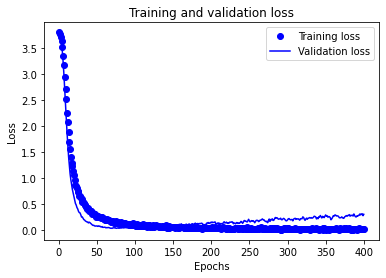

In [9]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
print(history_dict.keys())
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
guitar_data=[]
obj_r=open("./test/json/examples2.json")
data=json.load(obj_r)
note_set = np.zeros((45,1))
for file_data in data.items():
    if file_data[1]['instrument_family']==3 and file_data[1]["instrument_source_str"]=="acoustic":
        if 40<=file_data[1]['pitch']<=84:
            guitar_data.append([file_data[1]['note_str'],file_data[1]['pitch']])
            note_set[file_data[1]['pitch']-40] += 1
print(note_set)
# for i in wrong_poi:
#     print(guitar_data[i][0])

# for i in wrong_poi:
#     print(guitar_data[i][0])

[[17.]
 [20.]
 [14.]
 [18.]
 [18.]
 [19.]
 [14.]
 [22.]
 [17.]
 [15.]
 [17.]
 [12.]
 [15.]
 [16.]
 [14.]
 [19.]
 [17.]
 [15.]
 [21.]
 [20.]
 [16.]
 [15.]
 [17.]
 [15.]
 [18.]
 [18.]
 [17.]
 [15.]
 [14.]
 [18.]
 [17.]
 [12.]
 [17.]
 [17.]
 [16.]
 [19.]
 [17.]
 [12.]
 [22.]
 [21.]
 [15.]
 [18.]
 [19.]
 [16.]
 [15.]]
